# Mastering Machine Learning with Python

## Facilitator;
    Lucille Kaleha
    Data Analyst, Data Scientist, ML Engineer.

## Introduction

### What is Machine Learning
The science of getting machines to interpret, process and analyze data in order to solve real-world problems.

### Branches of ML
<img src="https://drive.google.com/uc?id=19SpxzT8uFCQt2nd9Xn7KNbnlyP-_DYbU" width="650">

### Supervised Learning
* In supervised learning, the ML model is trained based on the given input and its expected output, i.e., the label of the input. The model creates a mapping equation based on the inputs and outputs and predicts the label of the inputs in the future based on that mapping equation.

* Let’s suppose we have to develop a model that differentiates between a cat and a dog. To train the model, we feed multiple images of cats and dogs into the model with a label indicating whether the image is of a cat or a dog. The model tries to develop an equation between the input images and their labels. After training, the model can predict whether an image is of a cat or a dog even if the image is previously unseen by the model.

Below is an image of depicting the process of a Supervised model for a classification problem

<img src="https://drive.google.com/uc?id=1qnNZhhuzoMiZVEWPCQMj_KHBFBsh2cL6" width="750">

### Unsupervised Learning

* In unsupervised learning, the ML model is trained only on the inputs, without their labels. The model classifies the input data into classes that have similar features. The label of the input is then predicted in the future based on the similarity of its features with one of the classes.

* Suppose we have a collection of red and blue balls and we have to classify them into two classes. Let’s say all other features of the balls are the same except for their color. The model tries to find the dissimilar features between the balls on the basis of how the model can classify the balls into two classes. After the balls are classified into two classes depending on their color, we get two clusters of balls, one of blue color and one of red color.

<img src="https://drive.google.com/uc?id=1Ji62gIk8UoaQIX6HvoiJCrst_e58iFbx" width="750">

### Reinforcement Learning

* In reinforcement learning, the AI model tries to take the best possible action in a given situation to maximize the total profit. The model learns by getting feedback on its past outcomes.

* Consider the example of a robot that is asked to choose a path between A and B. In the beginning, the robot chooses either of the paths as it has no past experience. The robot is given feedback on the path it chooses and learns from this feedback. The next time the robot gets into a similar situation, it can use feedback to solve the problem. For example, if the robot chooses path B and gets a reward, i.e., positive feedback, this time the robot knows that it has to choose path B to maximize its reward.

### Objective
Our focus today will be on a Supervised ML Problem, Classification problem, to be precise. We will be using Machine Learning to evaluate the condition of a car based on it's characteristics.



The data we'll be working with was sourced from https://archive.ics.uci.edu/dataset/19/car+evaluation

Each car evaluation is described with 7 attributes. 6 of the attributes represent car characteristics, such as buying price, price of the maintenance, number of doors, capacity in terms of persons to carry, the size of luggage boot, and estimated safety of the car. The seventh variable(our target variable) represents the evaluation of the car (unacceptable, acceptable, good, very good). Our goal is to predict the evaluation of the cars based on the available characteristics.


#### Import Necessary Libraries


In [ ]:
# Uncomment only if you need it
# !pip install pandas_profiling

In [ ]:
# loading and manipulating data
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport

# visualization
import seaborn as sns
from matplotlib import pyplot as plt

# modeling
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# model evaluation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# save model
import pickle


In [ ]:
# loading the .data file into our environment
df = pd.read_csv('car.data')
df.columns =['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


### Data Understanding

In [ ]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

The data we are using today does not need a lot of cleaning and/or manipulation for modeling, which is very critical for any ML project. Here is what you should be aware of;

### Data Cleaning

Data cleaning is usually the most time-consuming stage of the Data Science process. This stage may take up to 50-80% of a Data Scientist's time as there are a vast number of possible problems that make the data "dirty" and unsuitable for analysis. Some of the problems you may see in data are:

* Inconsistencies in data
* Misspelled text data
* Outliers
* Imbalanced data
* Invalid/outdated data
* Missing data

This stage requires the development of a careful strategy on how to deal with these issues. Such a strategy may vary substantially between different analyses depending on the nature of problems being solved.


<!-- <img src='images/image_data_cleaning_corrected.png' width="600"> -->
<img src='https://drive.google.com/uc?id=1AlBs7SUNdjLjuStKHgC0yAjLI_saDfRX' width="600">

### Data Exploration

Data exploration or Exploratory Data Analysis (EDA) helps highlight the patterns and relations in data. Exploratory analysis may involve the following activities:

* Calculating basic descriptive statistics such as the mean, the median, and the mode
* Creating a range of plots including histograms, scatter plots, and distribution curves to identify trends in the data
* Other interactive visualizations to focus on a specific segments of data

<!-- <img src='images/image_exploration.png' width="500"> -->
<img src='https://drive.google.com/uc?id=1t557oPYny8kaXIs90jmt0wtUbxsnrxfT' width="500">


### Feature Engineering

A "Feature" is a measurable attribute of the phenomenon being observed - the number of bedrooms in a house or the weight of a vehicle. Based on the nature of the analytical question asked in the first step, a Data Scientist may have to engineer additional features not found in the original dataset. Feature engineering is the process of using expert knowledge to transform raw data into meaningful features that directly address the problem you are trying to solve. For example, taking weight and height to calculate Body Mass Index for the individuals in the dataset. This stage will substantially influence the accuracy of the predictive model you construct in the next stage.

<!-- <img src='images/image_engineering.png' width="500"> -->
<img src='https://drive.google.com/uc?id=184P4HEH6hs-YbQCFDdxPkvkj6AytYbYN' width="500">

### Data Visualization

After deriving the required results from a statistical model, visualizations are normally used to summarize and present the findings of the analysis process in a form which is easily understandable by non-technical decision makers.

Data visualization could be thought of as an evolution of visual communication techniques as it deals with the visual representation of data. There are a wide range of different data visualization techniques, from bar graphs, line graphs and scatter plots to alluvial diagrams and spatio-temporal visualizations, each of which will work better for presenting certain types of information.

<!-- <img src='images/image_visualization.png' width="650"> -->
<img src='https://drive.google.com/uc?id=1ocxISohIsl1vgcEUKEbCd_HRYxMI2rih' width="650">

### Data Preparation

Machine learning algorithms cannot work with categorical data, the first thing to do ,therefore, is to convert our categorical variables into integers.
Due to the type of data we have, we will perform ordinal encoding, which will convert the data while still maintaining the weights of the ratings, i.e better rating more weight

In [ ]:
# First, we create an object 'column'_mapper in which we pass the encoding parameter. We do this for all the columns

# creating object
buying_mapper = {"low":1,
                 "med":2,
                 "high":3,
                 "vhigh":4}
# we'll use the above encoding on the maint column as well

lugboot_mapper = {"small":1,
                  "med":2,
                  "big":3}

safety_mapper = {"low":1,
                 "med":2,
                 "high":3}

class_mapper= {"unacc":1,
               "acc":2,
               "good":3,
               "vgood":4}

# passing parameter
df["buying_enc"] = df["buying"].replace(buying_mapper)
df["maint_enc"] = df["maint"].replace(buying_mapper)
df["lugboot_enc"] = df["lug_boot"].replace(lugboot_mapper)
df["safety_enc"] = df["safety"].replace(safety_mapper)
df["class_enc"] = df["class"].replace(class_mapper)

# assigning 5more in 'doors' and more in 'persons' with 5
df.loc[df['doors'] == '5more', 'doors'] = 5
df.loc[df['persons'] == 'more', 'persons'] = 5

# visualize the first 5 rows
df.head()

,buying,maint,doors,persons,lug_boot,safety,class,buying_enc,maint_enc,lugboot_enc,safety_enc,class_enc
0,vhigh,vhigh,2,2,small,med,unacc,4,4,1,2,1
1,vhigh,vhigh,2,2,small,high,unacc,4,4,1,3,1
2,vhigh,vhigh,2,2,med,low,unacc,4,4,2,1,1
3,vhigh,vhigh,2,2,med,med,unacc,4,4,2,2,1
4,vhigh,vhigh,2,2,med,high,unacc,4,4,2,3,1


In [ ]:
# Extract the columns we will be using to build our model and save it in a diferent dataframe

ml_df = df[['buying_enc','maint_enc','lugboot_enc',
            'safety_enc','doors','persons','class_enc']].copy()
ml_df.head()

,buying_enc,maint_enc,lugboot_enc,safety_enc,doors,persons,class_enc
0,4,4,1,2,2,2,1
1,4,4,1,3,2,2,1
2,4,4,2,1,2,2,1
3,4,4,2,2,2,2,1
4,4,4,2,3,2,2,1


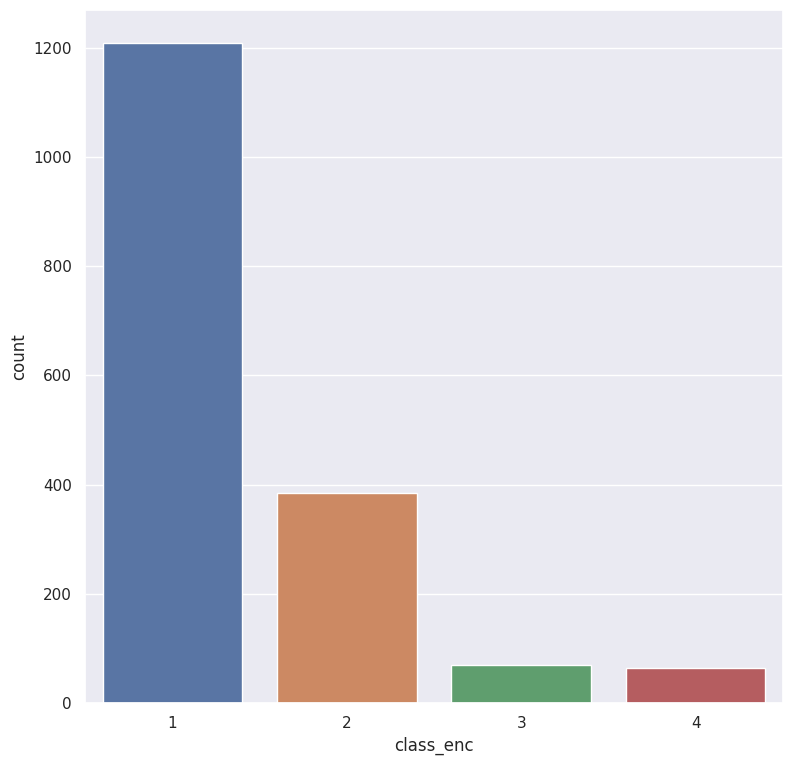

In [ ]:
# checking the distribution of the target class using a countplot

sns.countplot(x = ml_df['class_enc'], data= ml_df);

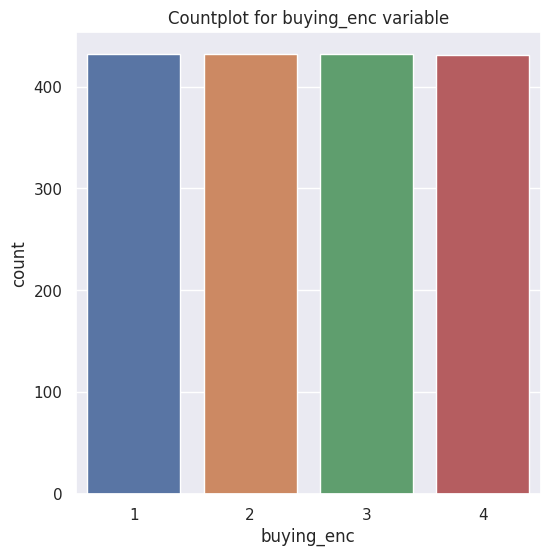

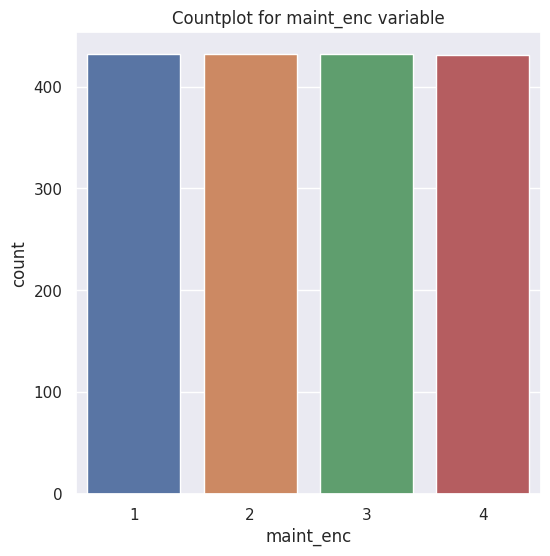

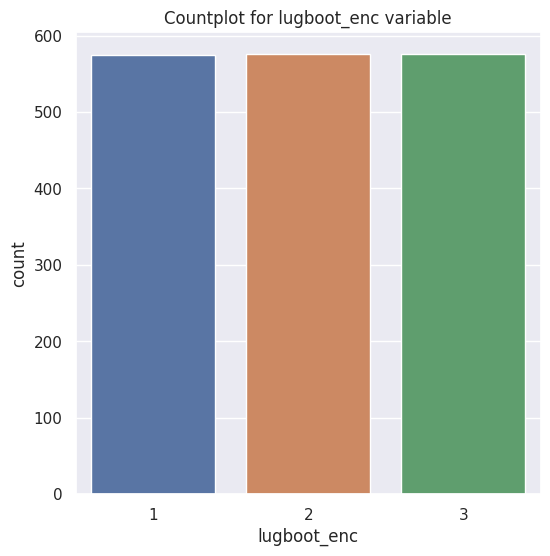

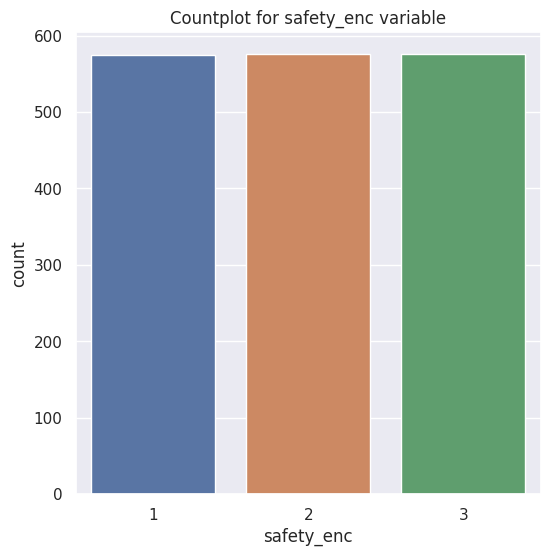

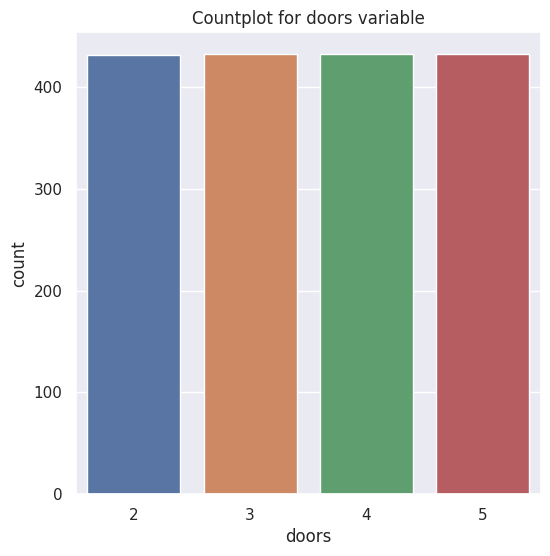

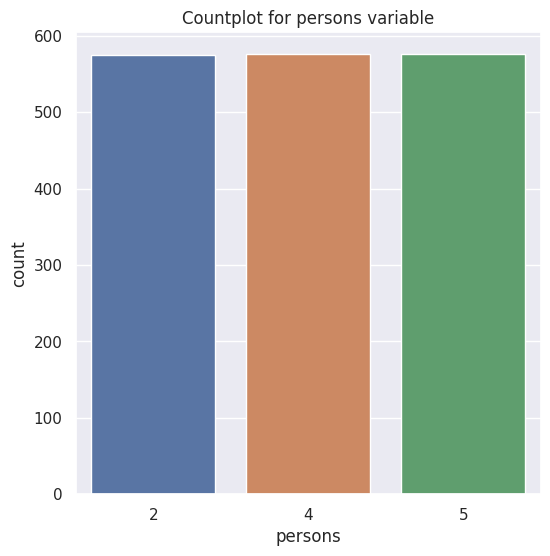

In [ ]:
# in order for our model to be generalize well on future data we have to deal with class imbalance by
# oversampling the minority class. Before that, let's check how the distribution is across the other variables


for i in ml_df.columns[:-1]: # selecting all columns except the last column, i.e. ml_df.drop(columns=['rating_mapped'])
    plt.figure(figsize=(6,6))
    plt.title("Countplot for {} variable".format(i))
    sns.countplot(x=i, data= ml_df)

In [ ]:
ml_df['doors'] = ml_df['doors'].astype(int)
ml_df['persons'] = ml_df['persons'].astype(int)
ml_df.dtypes

buying_enc     int64
maint_enc      int64
lugboot_enc    int64
safety_enc     int64
doors          int64
persons        int64
class_enc      int64
dtype: object

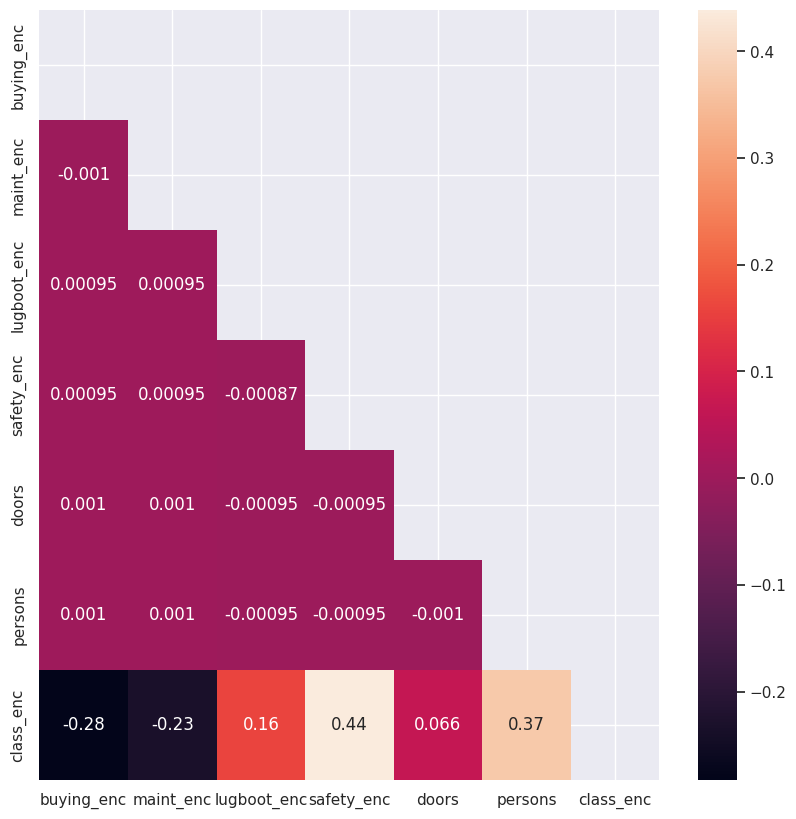

In [ ]:
# checking the pearson correlation of the df
corr = ml_df.corr()
matrix = np.triu(np.ones_like(corr))
fig=plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True, mask=matrix);

The correlation between the variables is very low, thus no reason to plot individual relationships between them

## Modeling

Modeling is the stage where you use mathematical and/or statistical approaches to answer your analytical question. Predictive Modeling refers to the process of using probabilistic statistical methods to try to predict the outcome of an event. For example, based on employee data, an organization can develop a predictive model to identify employee attrition rate in order to develop better retention strategies.

Choosing the "right" model is often a challenging decision as there is never a single right answer. Selecting a model involves balancing the accuracy and computational cost of the analysis process. For example, some recent approaches in predictive modeling such as deep learning have been shown to offer vastly improved accuracy of results, but with a very high computational cost.

<!-- <img src='images/image_predictive.png' width="250"> -->
<img src='https://drive.google.com/uc?id=1WhUFiZClZYV0pxZ-fTs7NFPOSy9Dm50X' width="250">


In [ ]:
# Splitting the data into X(independent variables) and y(target variables)
X = ml_df[ml_df.columns[:-1]]
y = ml_df['class_enc']

In [ ]:
# Splitting the data into X(independent variables) and y(target variables)
X = ml_df[ml_df.columns[:-1]]
y = ml_df['class_enc']

# Then divide into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

### Multinomial Logistic Regression Model

 Our dataset involves classifying cars into multiple categories, such as "unacceptable," "acceptable," "good," and "very good." Since there are more than two distinct classes, a multinomial logistic regression model is suitable for handling multiclass classification problems. It s specifically designed to model and predict outcomes with multiple categories.

It is a relatively simple and computationally efficient algorithm and makes it a practical choice for smaller datasets,especially when interpretability is valued.

Before we fit our model, we first need to normalize the data.

The main idea behind normalization/standardization is that variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus, to deal with this potential problem feature-wise normalization such as MinMax Scaling is usually used prior to model fitting.

When we perform scaling on our models, it is often easier to take the entire dataset, scale it, then cross validate. However, what this does is allow data leakage. Data leakage in machine learning is a big problem. When we build machine learning models, we do everything we can to avoid training our model with anything from the testing data set.

In [ ]:
# Let's create a pipeline that applies scaling on each fold

# declare the steps in our pipeline
pipe = Pipeline(steps = [('minmaxcaler', MinMaxScaler()),
                      ('logisticregression',LogisticRegression(solver='lbfgs', multi_class='multinomial'))])

# fit the pipeline to our training data
pipe.fit(X_train, y_train)


Pipeline(steps=[('minmaxcaler', MinMaxScaler()),
                ('logisticregression',
                 LogisticRegression(multi_class='multinomial'))])

In [ ]:
predicted = pipe.predict(X_test)
pipe.score(X_test,y_test)

0.838150289017341

In [ ]:
# model evaluation
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           1       0.91      0.94      0.92       371
           2       0.66      0.66      0.66       114
           3       0.42      0.28      0.33        18
           4       0.75      0.38      0.50        16

    accuracy                           0.84       519
   macro avg       0.68      0.56      0.60       519
weighted avg       0.83      0.84      0.83       519



### Plotting a Confusion Matrix

The confusion matrix is an essential tool in machine learning for evaluating the performance of classification models. It provides a clear representation of how well the model is performing in terms of true positives, false positives, true negatives, and false negatives.

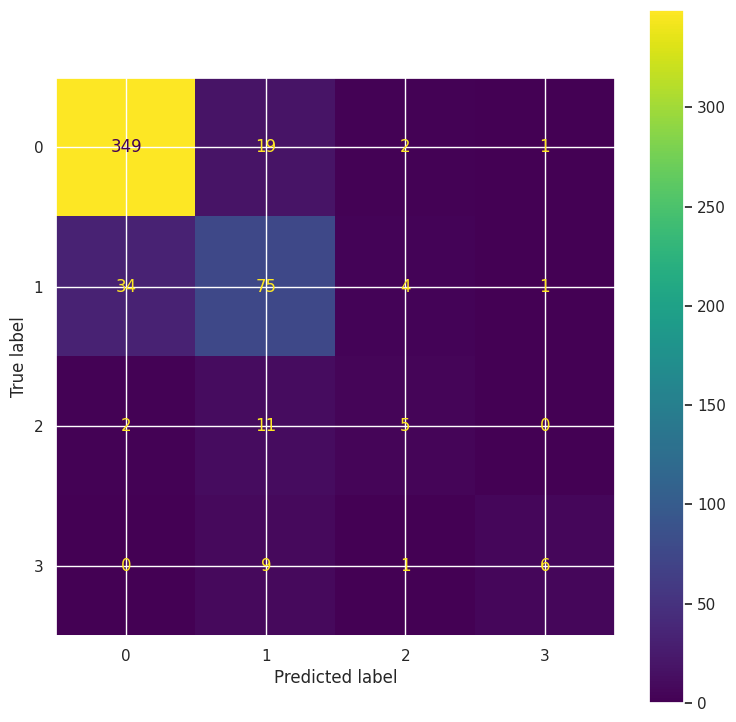

In [ ]:
# model evaluation

plt.rcParams["figure.figsize"] = (9,9) #setting the size o the conf matrix
sns.set(font_scale=1.0) #increasing the font of the values inside the matrix

disp = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, predicted))
disp.plot();

To interpret the confusion matrix, we need to understand the following terms:

-True Positive (TP): The model correctly predicted the positive class.

-False Positive (FP): The model predicted the positive class, but it was actually negative.

-True Negative (TN): The model correctly predicted the negative class.

-False Negative (FN): The model predicted the negative class, but it was actually positive.

Once we have identified these values from the confusion matrix, we can calculate several key metrics to evaluate the performance of our classification model:

-Accuracy: The percentage of correct predictions made by the model. It is calculated as (TP + TN) / (TP + TN + FP + FN).

-Precision: The percentage of positive predictions made by the model that were correct. It is calculated as TP / (TP + FP).

-Recall: The percentage of actual positive cases that were correctly predicted by the model. It is calculated as TP / (TP + FN).

-F1-score: The harmonic mean of precision and recall. It is a balanced measure that considers both precision and recall. It is calculated as 2 * (precision * recall) / (precision + recall).


The logistic regression model achieved an accuracy of 84%, with varying precision, recall, and F1-scores across the different acceptability classes. Class 1 (unacceptable) has the highest precision, recall, and F1-score, indicating good performance. However, for classes 2, 3, and 4, the precision, recall, and F1-scores are lower, indicating difficulty in accurately predicting these classes.

### Applying SMOTE

As we saw earlier we have a large class imbalance in our data, we sometimes will want to create artificial data from the minority class in order to create better class balance. There are multiple methods to do this, but the method we explore here is a pretty standard and simple one, SMOTE.

In [ ]:
# applying smote to see whether there will be any improvement with the prediction

# instead of using scikit learn's pipeline, we import from imblearn
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
# just like we did for MinMaxScaler, we instantiate SMOTE within the pipeline
pipe_sm = Pipeline(steps = [('smote', SMOTE(random_state = 23)),
                      ('minmaxscaler', MinMaxScaler()),
                      ('logisticregression', LogisticRegression(solver='lbfgs', multi_class='multinomial'))])
pipe_sm.fit(X_train, y_train)

predicted_sm = pipe_sm.predict(X_test)

# The inbuilt score method tests for accuracy in classification
# and R2 score in regression
pipe_sm.score(X_test,y_test)

0.8265895953757225

In [ ]:
# incase you encounter the [error No module named 'imblearn'] in the above cell run the command below
# !pip install imblearn

In [ ]:
cross_val_score(pipe_sm, X_train, y_train)

array([0.77272727, 0.8553719 , 0.7892562 , 0.81742739, 0.82157676])

In [ ]:
print(classification_report(y_test,predicted_sm))

              precision    recall  f1-score   support

           1       0.98      0.83      0.90       371
           2       0.64      0.79      0.71       114
           3       0.43      1.00      0.60        18
           4       0.61      0.88      0.72        16

    accuracy                           0.83       519
   macro avg       0.66      0.87      0.73       519
weighted avg       0.87      0.83      0.84       519



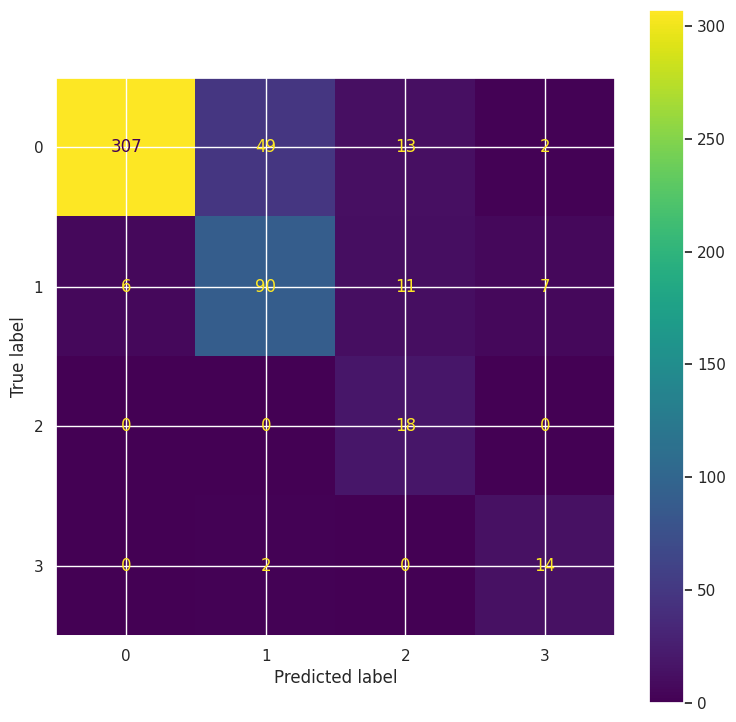

In [ ]:
plt.rcParams["figure.figsize"] = (9,9) #setting the size o the conf matrix
sns.set(font_scale=1.0) #increasing the font of the values inside the matrix

disp = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test,
                                                                  predicted_sm))
disp.plot();

The model still performed well, but not as well as our baseline model. There could be a few reasons why this happened;

* Logistic regression is not particularly sensitive to class imbalance. However, if the dataset was already well-balanced or moderately imbalanced, applying SMOTE might have introduced synthetic examples that deviated from the original data distribution. These artificially generated instances could have led to a loss of important information or introduced noise, which negatively impacted the performance of the logistic regression model.

* SMOTE can sometimes lead to overfitting, especially if the synthetic examples generated by SMOTE do not accurately represent the underlying patterns in the original data. Overfitting occurs when the model becomes too specific to the training data and fails to generalize well to new, unseen data. If the synthetic examples from SMOTE dominated the training data, the logistic regression model might have become overly complex and overfitted to the augmented dataset.

### Decision Tree Classifier

Decision trees do not assume any specific distribution or relationship between features, making them suitable for a wide range of data scenarios. They can also handle a more complex decision boundary compared to Logistic Regression.This flexibility allows decision tree classifier to adapt well to the specific characteristics of the car evaluation dataset.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# declare the steps in our pipeline
dtc_pipe = Pipeline(steps = [('minmaxcaler', MinMaxScaler()),
                      ('dtc',DecisionTreeClassifier(class_weight = 'balanced', random_state = 23))])

# fit the pipeline to our training data
dtc = dtc_pipe.fit(X_train, y_train)

dtc_predicted = dtc.predict(X_test)
dtc.score(X_test,y_test)


0.9903660886319846

In [ ]:
print(classification_report(y_test,dtc_predicted))

              precision    recall  f1-score   support

           1       0.99      0.99      0.99       371
           2       0.98      0.97      0.98       114
           3       1.00      1.00      1.00        18
           4       1.00      1.00      1.00        16

    accuracy                           0.99       519
   macro avg       0.99      0.99      0.99       519
weighted avg       0.99      0.99      0.99       519



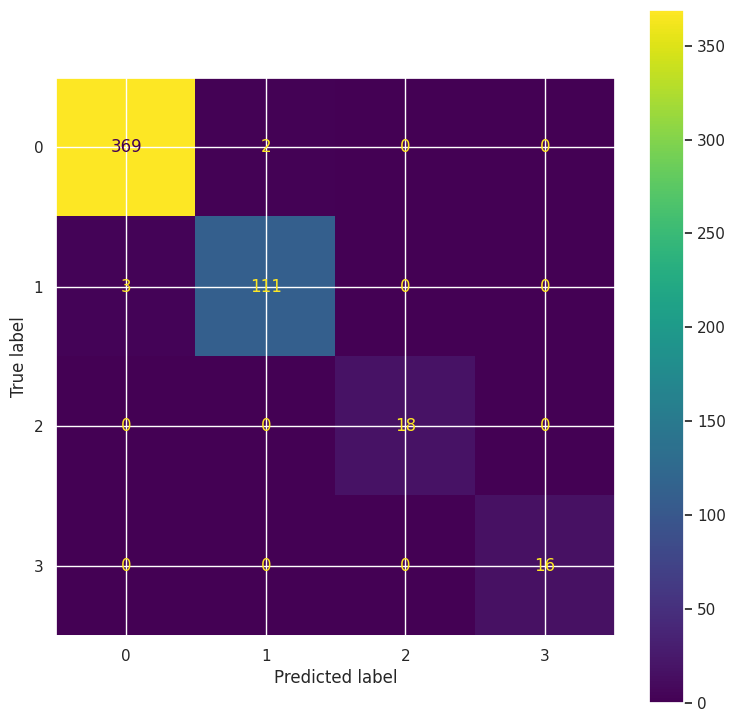

In [ ]:
plt.rcParams["figure.figsize"] = (9,9) #setting the size o the conf matrix
sns.set(font_scale=1.0) #increasing the font of the values inside the matrix

disp = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, dtc_predicted))
disp.plot();

The decision tree classifier performed exceptionally well, with an accuracy of 99% on the car evaluation dataset. The precision, recall, and F1-scores for all classes (1, 2, 3, and 4) are consistently high, indicating excellent performance across the board.


## Conclusion

 The decision tree classifier remains the superior choice for the car evaluation dataset. It exhibits outstanding performance, achieving near-perfect accuracy and high precision, recall, and F1-scores for all acceptability classes. In contrast, logistic regression achieved a lower accuracy of 84% and demonstrated lower performance, particularly for predicting classes 2, 3, and 4.

Therefore, the decision tree classifier remains the recommended model for accurately predicting car acceptability based on the given dataset. This is therefore the model we'll save for deployment.

In [ ]:
# create a context manager to save the model
with open('model_pkl', 'wb') as files:
    pickle.dump(dtc, files)

## Next Steps

### Deployment

In machine learning, deployment refers to the process of taking a trained model and making it available for use in real-world applications. Deploying a model involves integrating it into an operational system or platform, where it can receive input data, make predictions or classifications, and provide valuable insights or actions.

Deployment is a crucial step in the machine learning lifecycle as it bridges the gap between developing models and putting them into practical use. It allows organizations to leverage the power of machine learning algorithms and apply them to solve complex problems, automate decision-making processes, improve efficiency, and enhance user experiences.

In order to deploy the model we have built for this project, follow along with these resources and let me know how it goes;

1.   [Deploying a basic Streamlit app](https://towardsdatascience.com/deploying-a-basic-streamlit-app-ceadae286fd0)
2.   [Machine Learning Model Deployment](https://www.analyticsvidhya.com/blog/2021/10/machine-learning-model-deployment-using-streamlit/)
3.   [Car Evaluation Deploment Example](https://github.com/kurtispykes/car-evaluation-project/tree/Main)





